In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. 평균비교

#### 평균

- 범주 -> 숫자의 관계를 살펴볼 때 중요한 관점) '평균비교'
- 두 가지를 고려해야 함.
    - 1. 평균값이 그 집단을 대표할 수 있는가?
    - 2. 평균값이 믿을만 한가?

### 1) 평균값이 그 집단을 대표할 수 있는가?

In [3]:
s0 = titanic.loc[titanic['Survived']==0, 'Age']
s1 = titanic.loc[titanic['Survived']==1, 'Age']

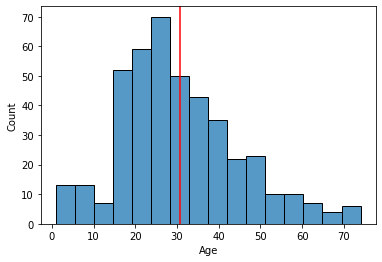

In [4]:
# 사망자의 나이 분포
sns.histplot(s0, bins = 16)
plt.axvline(s0.mean(), color = 'r')
plt.show()

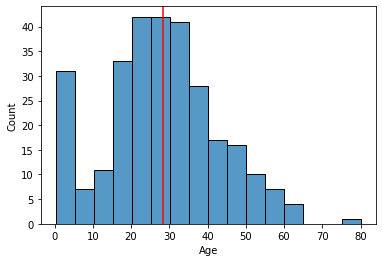

In [5]:
# 생존자의 나이 분포
sns.histplot(s1, bins = 16)
plt.axvline(s1.mean(), color = 'r')
plt.show()

- 평균이 집단을 대표하지 못할때

In [6]:
# 임의의 한 집단을 만들어 봅시다.
pop = [round(rd.normalvariate(10, 5),1) for i in range(1000)] + [round(rd.normalvariate(38, 8),1) for i in range(750)]
mn = np.mean(pop)
print(mn)

21.97714285714286


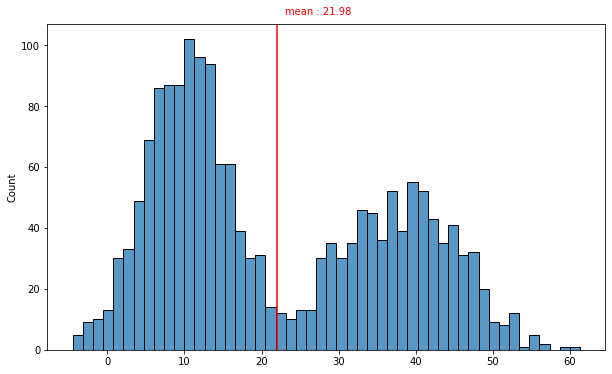

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(pop, bins = 50)
plt.axvline(mn, color='r')
plt.text(mn+1, 110, "mean : {}".format(round(mn,2)), color = 'r')
plt.show()

- 이 경우, 집단을 대표할 수 없다.

### 2) 평균값은 믿을만 한가?

- 평균이 믿을만 한지는 오차로 평가해야 한다.
    - 표준편차
    - 표준오차

### 3) 표준편차 (SD, Standard Deviation)

- 한 집단을 설명하기 위함. (집단 안에서 대표값으로 평균을 구할 때)
- 값들이 평균으로부터 얼마나 벗어나 있는지 (deviation)을 나타내는 값.

In [8]:
a = np.array([23, 54, 47, 64, 29, 15])

print(f"평균 : {a.mean()}")
print(f"표준편차 : {a.std()}")

평균 : 38.666666666666664
표준편차 : 17.53726191728787


- 평균과 표준편차를 집단 a를 설명 (대표) 하는 숫자.

In [9]:
# 표준편차
titanic.groupby('Survived')['Age'].agg(['mean','std'])

,mean,std
Survived,,
0,30.626179,14.172110
1,28.343690,14.950952


### 4) 표준오차 (SE, Standard Error)

- 표준편차와 다른 개념.
- 표집 (sampling) 의 목적은 모집단을 추정하기 위함.
    - 표본평균을 계산한다 = 표본의 평균으로 모집단의 평균을 추정하기 위함. (추정치)
    - 표본 자체의 평균이라는 의미가 아닌, 모평균을 표본으로 추정한 평균치.
- 표본평균은 모평균과 완전히 일치할 수 없다.
    - 이 오차를 표준오차라고 함.
    - 표준오차로부터 신뢰구간을 계산하게 된다.

In [10]:
titanic.groupby('Survived')['Age'].agg(['mean', 'std', 'sem'])

,mean,std,sem
Survived,,,
0,30.626179,14.172110,0.688258
1,28.343690,14.950952,0.877950


### 5) 95% 신뢰구간

In [11]:
# 임의의 모집단
pop2 = [round(rd.normalvariate(160, 10), 1) for i in range(100000)]

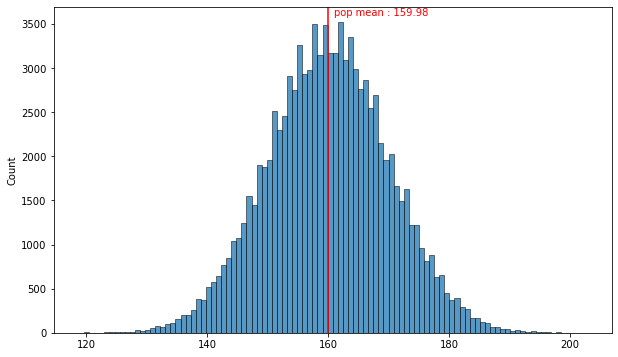

In [12]:
# 모집단을 확인하는 것은 불가능하지만 확인해보기 ^^
plt.figure(figsize = (10, 6))
sns.histplot(pop2, bins = 100)
plt.axvline(np.mean(pop2), color = 'r')
plt.text(np.mean(pop2)+1, 3600, f'pop mean : {np.mean(pop2).round(2)}', color = 'r')
plt.show()

- 100명을 임의로 샘플링해서 표본평균, 표준오차, 신뢰구간을 계산

In [13]:
# 표본조사 100건
s1 = rd.sample(pop2, 100) # 모집단에서 표집
s1 = pd.Series(s1) # 시리즈로 바꿈
s1.mean(), s1.std(), s1.sem()

(159.52399999999997, 11.124248879421618, 1.1124248879421619)

In [14]:
1.96 * s1.sem()

2.180352780366637

In [15]:
# 95% 신뢰구간은 모평균을 포함한다.
s1.mean() - (1.96 * s1.sem()), s1.mean() + (1.96 * s1.sem())

(157.34364721963334, 161.7043527803666)

- 표본평균의 신뢰구간과 모평균을 비교

In [16]:
# 모평균
np.mean(pop2)

159.979411

- 95% 신뢰구간에 대한 실험
    - Sampling을 100번 수행.
    - 그 때마다 신뢰구간을 계산한 후 그 중 몇번이 모평균을 포함하는지 확인.
    - 95% 신뢰구간 -> 100번 중 95번은 모평균을 포함해야 한다.

In [17]:
# 100번 샘플링
samples = { 'id' : [], 'value' : []}
for i in range(100) :
    samples['id'] += [i]* 100
    samples['value'] += rd.sample(pop2,100)

samples = pd.DataFrame(samples)
samples.shape

(10000, 2)

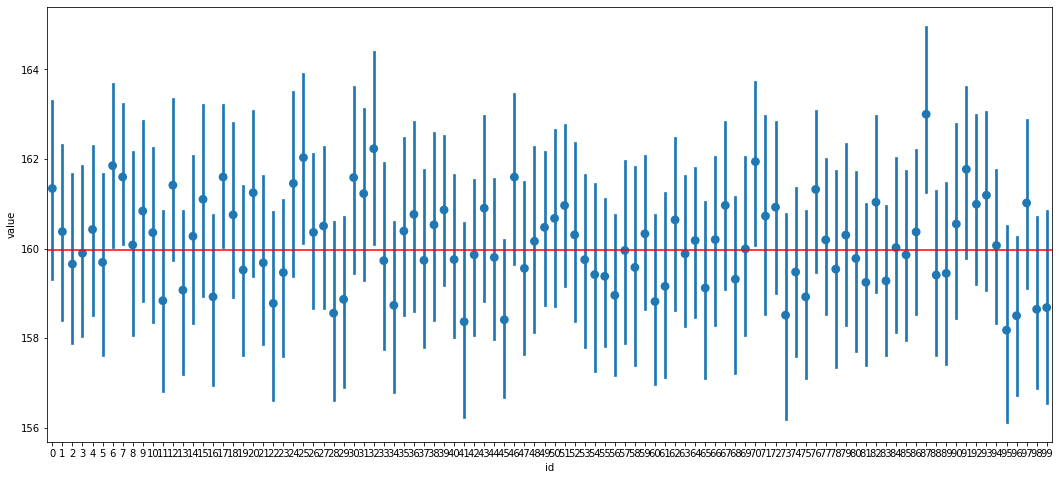

In [18]:
# errorbar
# 신뢰구간, 표준오차 구간을 시각화

plt.figure(figsize = (18, 8))
sns.pointplot(x = 'id', y = 'value', data = samples, join = False)
plt.axhline(np.mean(pop2), color = 'r')
plt.show()

- x축은 100번 시도에 대한 index.
- y축은 모평균(빨간 선)을 추정하기 위한 샘플의 평균과 신뢰구간.

### 6) 중심극한 정리

- 표본이 클수록 표집분포는 정규분포에 가까워 진다.

In [19]:
# 모집단 생성
pop = [round(rd.expovariate(.3)+165,2) for i in range(10001)]

- 모집단으로부터 표본을 뽑아 표본평균을 계산.
- 이를 m번 반복하여 얻은 표본평균 m개의 분포 계산.

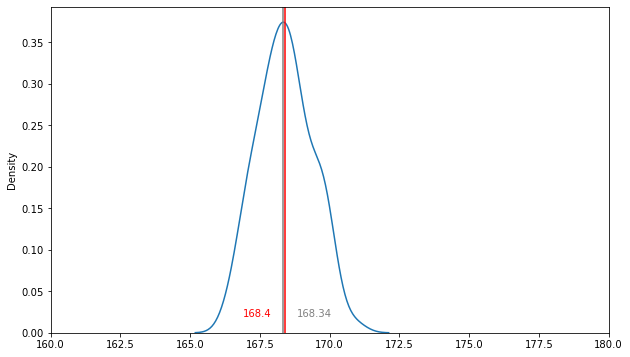

In [20]:
# 표본의 크기
n = 10

# 표본의 갯수
m = 100

sample_mean = [np.mean(rd.sample(pop,n)) for i in range(m)]

plt.figure(figsize=(10,6))
sns.kdeplot(sample_mean)
plt.xlim(160,180)

plt.axvline(x=np.mean(sample_mean), color = 'red') #표본평균들의 평균
plt.axvline(x=np.mean(pop), color = 'grey') # 모평균

plt.text(np.mean(sample_mean)-1.5, 0.02, round(np.mean(sample_mean),2), color = 'red') #표본평균들의 평균
plt.text(np.mean(pop)+.5,0.02, round(np.mean(pop),2), color = 'grey') #모평균

plt.show() # show

- 정규분포에 근사.

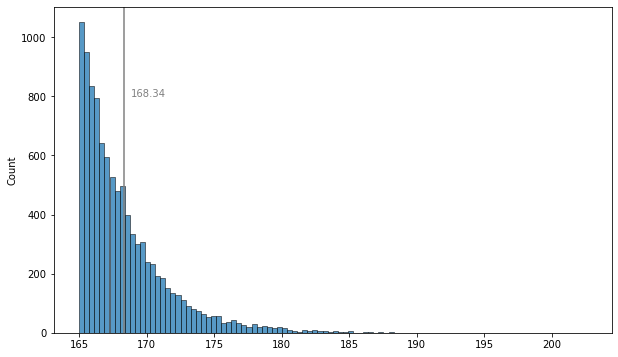

In [21]:
# 모집단의 분포
plt.figure(figsize=(10,6)) #설정
sns.histplot(pop, bins = 100)
plt.axvline(x=np.mean(pop), color = 'grey') # 모평균
plt.text(np.mean(pop)+.5, 800, round(np.mean(pop),2), color = 'grey')
plt.show() 

- 정규분포에 근사하지 않다.